In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Load data
df_test = pd.read_csv("test.csv", index_col = 'Id')

df_train = pd.read_csv("train.csv", index_col = 'Id')
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [369]:
# Indentify quantitative columns
aux = (df_train.dtypes != object)
quant_cols = list(aux[aux].index)
print("Quantitative columns: {}".format(quant_cols))

Quantitative columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [370]:
# Creat a new dataframe with quantitative columns
df = df_train[quant_cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [371]:
# Fill NaN values
df.fillna(df.mean(), inplace=True)
df.isna().all().any()

c:\users\thiago senra\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


False

In [372]:
# Check duplicated
df.duplicated().any()

False

In [373]:
# Drop columns with categorical variables
df = df.drop(columns=['MSSubClass'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [374]:
# Define response variable and intercept
y = df.SalePrice
df['intercept'] = 1

## YearBuilt 

Let's check the correlation between YearBuilt and SalePrice:

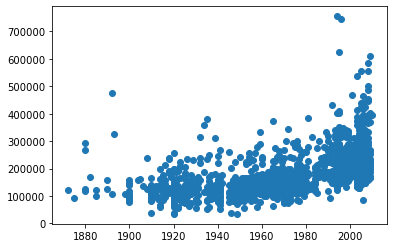

In [375]:
# YearBuilt Scatterplot
plt.scatter(df.YearBuilt, y );

In [376]:
# Linear Regression Model
lm2 = sm.OLS(y, df[['intercept', 'YearBuilt']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          2.99e-103
Time:                        22:03:58   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case, **_R-squared_** is equal to $0.273$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.273} = 0.522$ and indicate a **moderate** linear correlation (**_r_** is the Pearson's correlation).

## OverallQual
 
 Let's check the correlation between OverallQual and SalePrice:


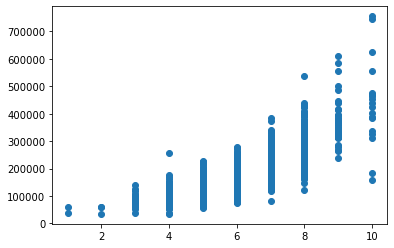

In [377]:
#OverallQual  Scatterplot
plt.scatter(df.OverallQual, y );

In [378]:
# Linear Regression Model
lm3 = sm.OLS(y, df[['intercept', 'OverallQual']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          2.19e-313
Time:                        22:03:59   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**_R-squared_** is equal to $0.626$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.626} = 0.791$ and indicate a **strong** linear correlation.

## TotRmsAbvGrd

 Let's check the correlation between TotRmsAbvGrd and SalePrice:


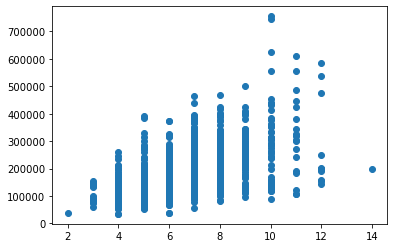

In [379]:
# Scatter plot
plt.scatter(df.TotRmsAbvGrd, y );

In [380]:
# Linear Regression Model
lm4 = sm.OLS(y, df[['intercept', 'TotRmsAbvGrd']])
results4 = lm4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     580.8
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          2.77e-108
Time:                        22:03:59   Log-Likelihood:                -18299.
No. Observations:                1460   AIC:                         3.660e+04
Df Residuals:                    1458   BIC:                         3.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      1.09e+04   7271.180      1.499      0.134   -3366.619    2.52e+04
TotRmsAbvGrd  2.609e+04   1082.458     24.099      0.000     2.4e+04    2.82e+04
==============================================================================
Omnibus:                      443.473   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.440
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                       8.451   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**_R-squared_** is equal to $0.285$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.285} = 0.534$ and indicate a **moderate** linear correlation.

## GarageArea

 Let's check the correlation between GarageArea and SalePrice:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          5.27e-158
Time:                        22:03:59   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

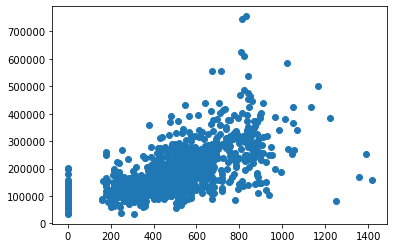

In [381]:
# Scatter plot
plt.scatter(df.GarageArea, y);

# Linear Regression Model
lm5 = sm.OLS(y, df[['intercept', 'GarageArea']])
results5 = lm5.fit()
results5.summary()

**_R-squared_** is equal to $0.389$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.389} = 0.624$ and indicate a **moderate** linear correlation.

## WoodDeckSF

 Let's check the correlation between WoodDeckSF and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     171.5
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.97e-37
Time:                        22:03:59   Log-Likelihood:                -18463.
No. Observations:                1460   AIC:                         3.693e+04
Df Residuals:                    1458   BIC:                         3.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.615e+05   2461.736     65.621      0.000    1.57e+05    1.66e+05
WoodDeckSF   205.6204     15.701     13.096      0.000     174.820     236.420
==============================================================================
Omnibus:                      599.515   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3541.366
Skew:                           1.820   Prob(JB):                         0.00
Kurtosis:                       9.705   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

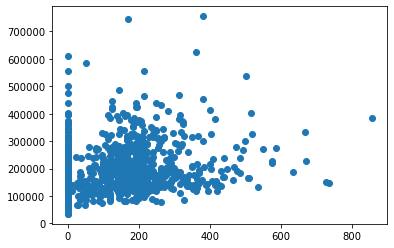

In [382]:
# Scatterplot
plt.scatter(df.WoodDeckSF, y);

# Linear Regression Model
lm6= sm.OLS(y, df[['intercept', 'WoodDeckSF']])
results6 = lm6.fit()
results6.summary()

**_R-squared_** is equal to $0.105$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.105} = 0.324$ and indicate a **moderate** linear correlation.

## GarageCars

 Let's check the correlation between GarageCars and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          2.50e-169
Time:                        22:04:00   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.062e+04   4102.261     14.777      0.000    5.26e+04    6.87e+04
GarageCars  6.808e+04   2138.212     31.839      0.000    6.39e+04    7.23e+04
==============================================================================
Omnibus:                      590.054   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.044
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      11.527   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

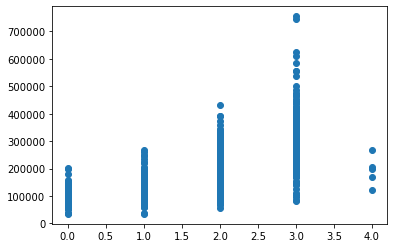

In [383]:
# Scatterplot
plt.scatter(df.GarageCars, df.SalePrice);

# Linear Regression Model
lm7= sm.OLS(y, df[['intercept', 'GarageCars']])
results7 = lm7.fit()
results7.summary()

**_R-squared_** is equal to $0.410$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.410} = 0.640$ and indicate a **moderate** linear correlation.

## 1stFlrSF

 Let's check the correlation between 1stFlrSF and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          5.39e-147
Time:                        22:04:00   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
1stFlrSF     124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

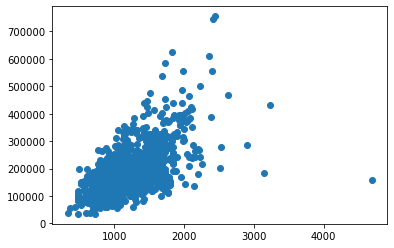

In [384]:
# Scatterplot
plt.scatter(df['1stFlrSF'], df.SalePrice);

# Linear Regression Model
lm5 = sm.OLS(y, df[['intercept', '1stFlrSF']])
results5 = lm5.fit()
results5.summary()

**_R-squared_** is equal to $0.367$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.410} = 0.606$ and indicate a **moderate** linear correlation.

## 2ndFlrSF

 Let's check the correlation between 2ndFlrSF and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     165.6
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           5.76e-36
Time:                        22:04:01   Log-Likelihood:                -18466.
No. Observations:                1460   AIC:                         3.694e+04
Df Residuals:                    1458   BIC:                         3.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.608e+05   2518.070     63.841      0.000    1.56e+05    1.66e+05
2ndFlrSF      58.1146      4.517     12.867      0.000      49.255      66.974
==============================================================================
Omnibus:                      571.072   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2664.405
Skew:                           1.812   Prob(JB):                         0.00
Kurtosis:                       8.538   Cond. No.                         712.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

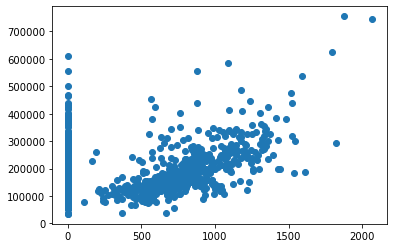

In [385]:
# Scatter plot
plt.scatter(df['2ndFlrSF'], df.SalePrice);

# Linera Regression Model
lm8 = sm.OLS(y, df[['intercept', '2ndFlrSF']])
results8 = lm8.fit()
results8.summary()

**_R-squared_** is equal to $0.105$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.105} = 0.324$ and indicate a **moderate** linear correlation.

## GrLivArea

 Let's check the correlation between GrLivArea and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          4.52e-223
Time:                        22:04:01   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

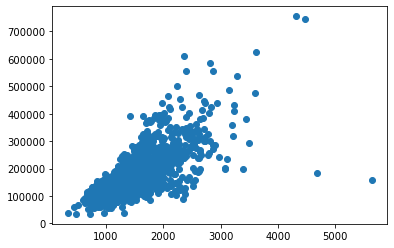

In [386]:
# Scatter plot
plt.scatter(df.GrLivArea, df.SalePrice);

# Linear Regression Model
lm9 = sm.OLS(y, df[['intercept', 'GrLivArea']])
results9 = lm9.fit()
results9.summary()

**_R-squared_** is equal to $0.502$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.502} = 0.708$ and indicate a **moderate** linear correlation.

## TotalBsmtSF

 Let's check the correlation between TotalBsmtSF and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          9.48e-152
Time:                        22:04:02   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

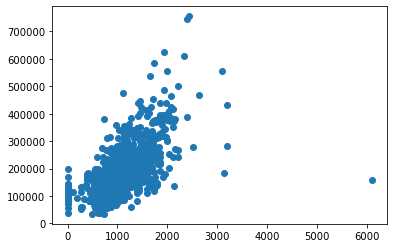

In [387]:
# Scatterplot
plt.scatter(df.TotalBsmtSF, y);

# Linera Regression Model
lm5 = sm.OLS(y, df[['intercept', 'TotalBsmtSF']])
results5 = lm5.fit()
results5.summary()

**_R-squared_** is equal to $0.376$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.376} = 0.613$ and indicate a **moderate** linear correlation.

## YearRemodAdd

 Let's check the correlation between YearRemodAdd and SalePrice:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     504.7
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.16e-96
Time:                        22:04:03   Log-Likelihood:                -18327.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1458   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -3.692e+06   1.72e+05    -21.415      0.000   -4.03e+06   -3.35e+06
YearRemodAdd  1951.2994     86.856     22.466      0.000    1780.923    2121.676
==============================================================================
Omnibus:                      677.205   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5931.459
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      12.068   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

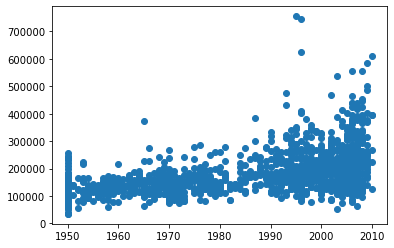

In [388]:
# Scatterplot
plt.scatter(df.YearRemodAdd, y);

# Linear Regression Model
lm5 = sm.OLS(y, df[['intercept', 'YearRemodAdd']])
results5 = lm5.fit()
results5.summary()

**_R-squared_** is equal to $0.257$, wich means that the amount of variability in the responde y explained by the model and the correlation coefficient is $r = \sqrt{0.257} = 0.507$ and indicate a **moderate** linear correlation.


## Multiple Linear Regression


In [389]:
# Quantitative columns used
cols = ['YearBuilt', 'OverallQual', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'GarageCars', '1stFlrSF', '2ndFlrSF', 'GrLivArea','TotalBsmtSF', 'YearRemodAdd']

# Matriz X
X = df[['intercept']+cols]

# Fit model
ml_reg = sm.OLS(y, X)
ml_results = ml_reg.fit()
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     458.0
Date:                Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:04:03   Log-Likelihood:                -17449.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1448   BIC:                         3.499e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -9.938e+05   1.22e+05     -8.137      0.000   -1.23e+06   -7.54e+05
YearBuilt      199.6437     48.192      4.143      0.000     105.111     294.177
OverallQual   1.961e+04   1182.012     16.589      0.000    1.73e+04    2.19e+04
TotRmsAbvGrd  -125.9265   1102.775     -0.114      0.909   -2289.134    2037.281
GarageArea      17.2535     10.202      1.691      0.091      -2.759      37.266
WoodDeckSF      40.2490      8.320      4.838      0.000      23.928      56.570
GarageCars    9300.4208   3018.060      3.082      0.002    3380.184    1.52e+04
1stFlrSF        46.6867     21.385      2.183      0.029       4.737      88.637
2ndFlrSF        34.3301     21.098      1.627      0.104      -7.056      75.717
GrLivArea       12.8588     21.035      0.611      0.541     -28.404      54.122
TotalBsmtSF     20.5778      4.251      4.841      0.000      12.240      28.916
YearRemodAdd   265.3086     62.947      4.215      0.000     141.831     388.786
==============================================================================
Omnibus:                      448.037   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53775.683
Skew:                          -0.255   Prob(JB):                         0.00
Kurtosis:                      32.727   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No modelo obtido, **_R-squared_** é igual a $0.777$, o que indica que a quantidade de variabilidade na resposta explicada pelo modelo é de 77,7%. No entanto, o coeficiente negativo para a variável'TotRmsAbvGrd' pode indicar a presença de Multicolinearidade, que afeta a acurácia do modelo.

### Multicolinearity & VIFs

In [390]:
# Calculate Variance Inflation Factors (VIFs)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,15340.201505,intercept
1,2.177260,YearBuilt
2,2.746345,OverallQual
3,3.301869,TotRmsAbvGrd
4,4.889779,GarageArea
5,1.117633,WoodDeckSF
6,5.227958,GarageCars
7,70.243144,1stFlrSF
8,87.174812,2ndFlrSF
9,125.569203,GrLivArea


Quando o VIF é maior ou igual a 10, há multicolinearidade em modelo. Nesse caso, '1stFlrSF', '2ndFlrSF' e 'GrLivArea' apresentaram VIFs altos. Assim vamos eliminar essas colunas deles para ver como o modelo funciona.

In [391]:
# Columns after removing '1stFlrSF', '2ndFlrSF' and 'GrLivArea' 
new_cols = ['YearBuilt', 'OverallQual', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'GarageCars','TotalBsmtSF', 'YearRemodAdd']

# Matriz X
X = df[['intercept']+new_cols]

# Fit model
ml_reg = sm.OLS(y, X)
ml_results = ml_reg.fit()
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     550.3
Date:                Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:04:03   Log-Likelihood:                -17526.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1451   BIC:                         3.512e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -8.804e+05   1.28e+05     -6.898      0.000   -1.13e+06    -6.3e+05
YearBuilt      108.3668     49.559      2.187      0.029      11.152     205.581
OverallQual   2.375e+04   1176.273     20.194      0.000    2.14e+04    2.61e+04
TotRmsAbvGrd  1.026e+04    743.728     13.800      0.000    8804.781    1.17e+04
GarageArea      31.4036     10.659      2.946      0.003      10.494      52.313
WoodDeckSF      52.4011      8.699      6.024      0.000      35.337      69.465
GarageCars    8923.9255   3170.164      2.815      0.005    2705.331    1.51e+04
TotalBsmtSF     35.6460      2.961     12.037      0.000      29.837      41.455
YearRemodAdd   283.4705     66.208      4.281      0.000     153.596     413.345
==============================================================================
Omnibus:                      560.317   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24194.902
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                      22.831   Cond. No.                     3.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Agora, o **_R-squared_** é igual a 0.752, coeficiente relacionado a coluna 'TotRmsAbvGrd' é alterado para um valor positivo e todos os p-valores relacionados aos coeficientes do modelo são suficientmente baixos. Então, nós podemos usar essas variáveis para treinar um algoritmo de machine learning para prever o preço de um conjunto de dados de teste. 

### Linear Regression - Scikit-learn

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [393]:
X = X.drop(columns='intercept')

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [395]:
print("Coefficients: {} \n".format(lr.coef_))
print("Intercept: {}".format(lr.intercept_))

Coefficients: [  117.48258792 23453.89974954  9754.72609274    33.44437978
    51.41859741  9166.77473227    31.08976777   300.01704874] 

Intercept: -923402.0978297523


In [398]:
print("Train set score: {}".format(lr.score(X_train, y_train)))
print("Test set score: {}".format(lr.score(X_test, y_test)))

Train set score: 0.7453604969309646
Test set score: 0.7692281245193546
